# Import libraries and data sets

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.cloud import storage
from google.cloud.storage.blob import Blob
import os

In [3]:
client = storage.Client()
bucket = "hackathon0711"

In [4]:
from google.cloud import storage


def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    # bucket_name = "your-bucket-name"
    # source_blob_name = "storage-object-name"
    # destination_file_name = "local/path/to/file"
    storage_client = storage.Client()

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(os.getcwd()+"/"+destination_file_name)

    print(
        "Blob {} downloaded to {}.".format(
            source_blob_name, destination_file_name
        )
    )


In [5]:
download_blob("hackathon0711", "listings 2019April.csv.gz", "listings 2019April.csv.gz")
download_blob("hackathon0711", "listings 2019March.csv.gz", "listings 2019March.csv.gz")
download_blob("hackathon0711", "listings 2019May.csv.gz", "listings 2019May.csv.gz")
download_blob("hackathon0711", "listings 2020April.csv.gz", "listings 2020April.csv.gz")
download_blob("hackathon0711", "listings 2020March.csv.gz", "listings 2020March.csv.gz")
download_blob("hackathon0711", "listings 2020May.csv.gz", "listings 2020May.csv.gz")

Blob listings 2019April.csv.gz downloaded to listings 2019April.csv.gz.
Blob listings 2019March.csv.gz downloaded to listings 2019March.csv.gz.
Blob listings 2019May.csv.gz downloaded to listings 2019May.csv.gz.
Blob listings 2020April.csv.gz downloaded to listings 2020April.csv.gz.
Blob listings 2020March.csv.gz downloaded to listings 2020March.csv.gz.
Blob listings 2020May.csv.gz downloaded to listings 2020May.csv.gz.


In [6]:
pd.set_option('display.max_columns', None)

df_sf_May_2020 = pd.read_csv("listings 2020May.csv.gz")
df_sf_May_2019 = pd.read_csv("listings 2019May.csv.gz")

df_sf_april_2020 = pd.read_csv("listings 2020April.csv.gz")
df_sf_april_2019 = pd.read_csv("listings 2019April.csv.gz")

df_sf_march_2020 = pd.read_csv("listings 2020March.csv.gz")
df_sf_march_2019 = pd.read_csv("listings 2019March.csv.gz")

In [7]:
df_bj_May_2020 = pd.read_csv("bj_2020_may.csv.gz")
df_bj_May_2019 = pd.read_csv("bj_2019_may.csv.gz")

df_bj_april_2020 = pd.read_csv("bj_2020_apr.csv.gz")
df_bj_april_2019 = pd.read_csv("bj_2019_apr.csv.gz")

df_bj_march_2020 = pd.read_csv("bj_2020_mar.csv.gz")
df_bj_march_2019 = pd.read_csv("bj_2019_mar.csv.gz")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (43,61,62,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (61,62,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
review_sf = pd.read_csv("reviews_sf_Jun08.csv.gz")

## Analyze the change before and after the Covid-19 - San Francisco

In [9]:
# index the data
df_sf_May_2020 = df_sf_May_2020.set_index(['id'])
df_sf_May_2019 = df_sf_May_2019.set_index(['id'])
df_sf_april_2020 = df_sf_april_2020.set_index(['id'])
df_sf_april_2019 = df_sf_april_2019.set_index(['id'])
df_sf_march_2020 = df_sf_march_2020.set_index(['id'])
df_sf_march_2019 = df_sf_march_2019.set_index(['id'])

# add tag for columns
df_sf_May_2020.columns = [str(col) + '_2020May' for col in df_sf_May_2020.columns]
df_sf_May_2019.columns = [str(col) + '_2019May' for col in df_sf_May_2019.columns]

df_sf_april_2020.columns = [str(col) + '_2020apr' for col in df_sf_april_2020.columns]
df_sf_april_2019.columns = [str(col) + '_2019apr' for col in df_sf_april_2019.columns]

df_sf_march_2020.columns = [str(col) + '_2020mar' for col in df_sf_march_2020.columns]
df_sf_march_2019.columns = [str(col) + '_2019mar' for col in df_sf_march_2019.columns]

In [10]:
#Merge dataset in the same month of 2019 and 2020
ab_march = df_sf_march_2019.merge(df_sf_march_2020,left_index=True, right_index=True)
ab_may = df_sf_May_2019.merge(df_sf_May_2020,left_index=True, right_index=True)

In [11]:
# clean the price march
ab_march['price_2019mar']= ab_march['price_2019mar'].str.replace("$","")
ab_march['price_2019mar'] = ab_march['price_2019mar'].str.replace(".",".")
ab_march['price_2019mar'] = ab_march['price_2019mar'].str.replace(",","")
ab_march['price_2019mar'] = pd.to_numeric(ab_march['price_2019mar'])

ab_march['weekly_price_2020mar']= ab_march['weekly_price_2020mar'].str.replace("$","")
ab_march['weekly_price_2020mar'] = ab_march['weekly_price_2020mar'].str.replace(".",".")
ab_march['weekly_price_2020mar'] = ab_march['weekly_price_2020mar'].str.replace(",","")
ab_march['weekly_price_2020mar'] = pd.to_numeric(ab_march['weekly_price_2020mar'])

ab_march['weekly_price_2019mar']= ab_march['weekly_price_2019mar'].str.replace("$","")
ab_march['weekly_price_2019mar'] = ab_march['weekly_price_2019mar'].str.replace(".",".")
ab_march['weekly_price_2019mar'] = ab_march['weekly_price_2019mar'].str.replace(",","")
ab_march['weekly_price_2019mar'] = pd.to_numeric(ab_march['weekly_price_2019mar'])

ab_march['monthly_price_2020mar']= ab_march['monthly_price_2020mar'].str.replace("$","")
ab_march['monthly_price_2020mar'] = ab_march['monthly_price_2020mar'].str.replace(".",".")
ab_march['monthly_price_2020mar'] = ab_march['monthly_price_2020mar'].str.replace(",","")
ab_march['monthly_price_2020mar'] = pd.to_numeric(ab_march['monthly_price_2020mar'])

ab_march['monthly_price_2019mar']= ab_march['monthly_price_2019mar'].str.replace("$","")
ab_march['monthly_price_2019mar'] = ab_march['monthly_price_2019mar'].str.replace(".",".")
ab_march['monthly_price_2019mar'] = ab_march['monthly_price_2019mar'].str.replace(",","")
ab_march['monthly_price_2019mar'] = pd.to_numeric(ab_march['monthly_price_2019mar'])

In [12]:
# clean price for may
ab_may['price_2019May']= ab_may['price_2019May'].str.replace("$","")
ab_may['price_2019May'] = ab_may['price_2019May'].str.replace(".",".")
ab_may['price_2019May'] = ab_may['price_2019May'].str.replace(",","")
ab_may['price_2019May'] = pd.to_numeric(ab_may['price_2019May'])

ab_may['weekly_price_2020May']= ab_may['weekly_price_2020May'].str.replace("$","")
ab_may['weekly_price_2020May'] = ab_may['weekly_price_2020May'].str.replace(".",".")
ab_may['weekly_price_2020May'] = ab_may['weekly_price_2020May'].str.replace(",","")
ab_may['weekly_price_2020May'] = pd.to_numeric(ab_may['weekly_price_2020May'])

ab_may['weekly_price_2019May']= ab_may['weekly_price_2019May'].str.replace("$","")
ab_may['weekly_price_2019May'] = ab_may['weekly_price_2019May'].str.replace(".",".")
ab_may['weekly_price_2019May'] = ab_may['weekly_price_2019May'].str.replace(",","")
ab_may['weekly_price_2019May'] = pd.to_numeric(ab_may['weekly_price_2019May'])

ab_may['monthly_price_2020May']= ab_may['monthly_price_2020May'].str.replace("$","")
ab_may['monthly_price_2020May'] = ab_may['monthly_price_2020May'].str.replace(".",".")
ab_may['monthly_price_2020May'] = ab_may['monthly_price_2020May'].str.replace(",","")
ab_may['monthly_price_2020May'] = pd.to_numeric(ab_may['monthly_price_2020May'])

ab_may['monthly_price_2019May']= ab_may['monthly_price_2019May'].str.replace("$","")
ab_may['monthly_price_2019May'] = ab_may['monthly_price_2019May'].str.replace(".",".")
ab_may['monthly_price_2019May'] = ab_may['monthly_price_2019May'].str.replace(",","")
ab_may['monthly_price_2019May'] = pd.to_numeric(ab_may['monthly_price_2019May'])

### **Compare number of listings in the platform BEFORE and AFTER COVID19:**

In [34]:
## listing number in sf in 2020 vs.2019
no_listing_sf = [
df_sf_May_2020.shape[0],
df_sf_May_2019.shape[0],
df_sf_april_2020.shape[0],
df_sf_april_2019.shape[0],
df_sf_march_2020.shape[0],
df_sf_march_2019.shape[0], ]

year = [2020,2019,2020,2019,2020,2019]

month = ["May","May","April","April","March","March"]

n_listing_sf = pd.DataFrame(list(zip(year, month, no_listing_sf)), 
               columns =['Year', 'Month','Num_of_listing']) 
n_listing_sf

,Year,Month,Num_of_listing
0,2020,May,7814
1,2019,May,7575
2,2020,April,8078
3,2019,April,7353
4,2020,March,8138
5,2019,March,7277


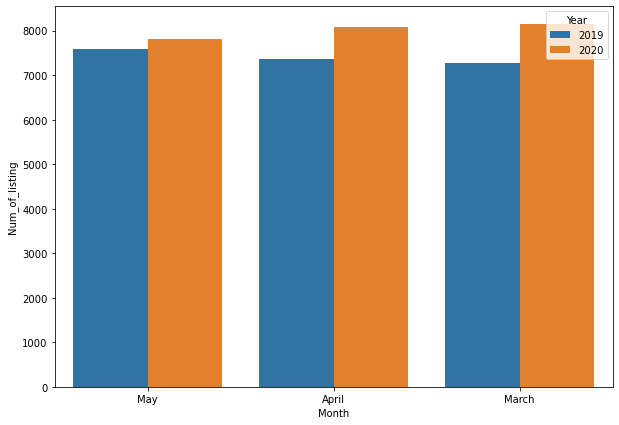

In [37]:
fig, axs = plt.subplots(figsize=(10,7))
sns.barplot(x="Month", y="Num_of_listing", hue="Year", data=n_listing_sf)

There's not much change. The Number of Listing even increased after Covid19.  
But this is not all of the story. A lot of hosts closed the availability of the listing instead of remove the listing from the platform.

### **Compare number of listings close the booking availability for next month/season in the platform BEFORE and AFTER COVID19:**

In [14]:
# display the availability_30 and availability_90 in table

avai_30 = [df_sf_May_2020[df_sf_May_2020['availability_30_2020May'] == 0].shape[0],
          df_sf_May_2019[df_sf_May_2019['availability_30_2019May'] == 0].shape[0],
          df_sf_april_2020[df_sf_april_2020['availability_30_2020apr'] == 0].shape[0],
         df_sf_april_2019[df_sf_april_2019['availability_30_2019apr'] == 0].shape[0],
       df_sf_march_2020[df_sf_march_2020['availability_30_2020mar'] == 0].shape[0],
       df_sf_march_2019[df_sf_march_2019['availability_30_2019mar'] == 0].shape[0] ]

avai_90 = [
df_sf_May_2020[df_sf_May_2020['availability_90_2020May'] == 0].shape[0],
df_sf_May_2019[df_sf_May_2019['availability_90_2019May'] == 0].shape[0],
df_sf_april_2020[df_sf_april_2020['availability_90_2020apr'] == 0].shape[0],
df_sf_april_2019[df_sf_april_2019['availability_90_2019apr'] == 0].shape[0],
df_sf_march_2020[df_sf_march_2020['availability_90_2020mar'] == 0].shape[0],
df_sf_march_2019[df_sf_march_2019['availability_90_2019mar'] == 0].shape[0],
]
year = [2020,2019,2020,2019,2020,2019]
month = ["May","May","April","April","March","March"]

avail = pd.DataFrame(list(zip(year, month, avai_30, avai_90)), 
               columns =['Year', 'Month','N_Listing_without_availability_next_month',"N_Listing_without_availability_next_season"]) 
avail

,Year,Month,N_Listing_without_availability_next_month,N_Listing_without_availability_next_season
0,2020,May,2736,1945
1,2019,May,3121,1688
2,2020,April,2804,2115
3,2019,April,2607,1620
4,2020,March,2799,1803
5,2019,March,2562,1482


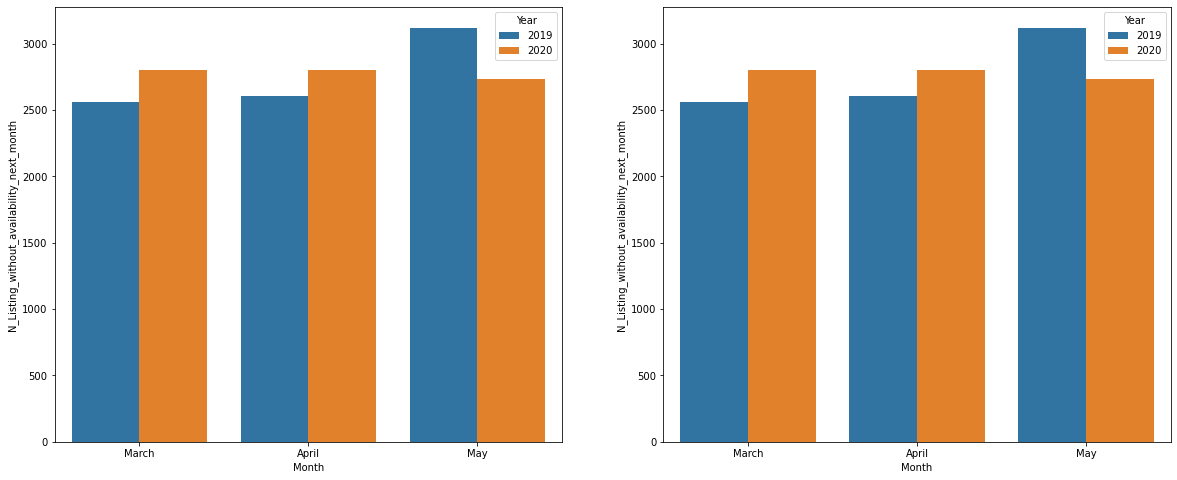

In [40]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(20,8))
sns.barplot(x="Month", y="N_Listing_without_availability_next_month", hue="Year", data=avail,ax = axs[0], order = ["March","April","May"] )
sns.barplot(x="Month", y="N_Listing_without_availability_next_month", hue="Year", data=avail,ax = axs[1], order = ["March","April","May"] )

**Compare price distribution of listings in SF under the impace of COVID19**

Normally, when the economies is down, people usually give discounts to customers so that they make up certain proportion of revenue. Is this true for the hosts of Airbnb?

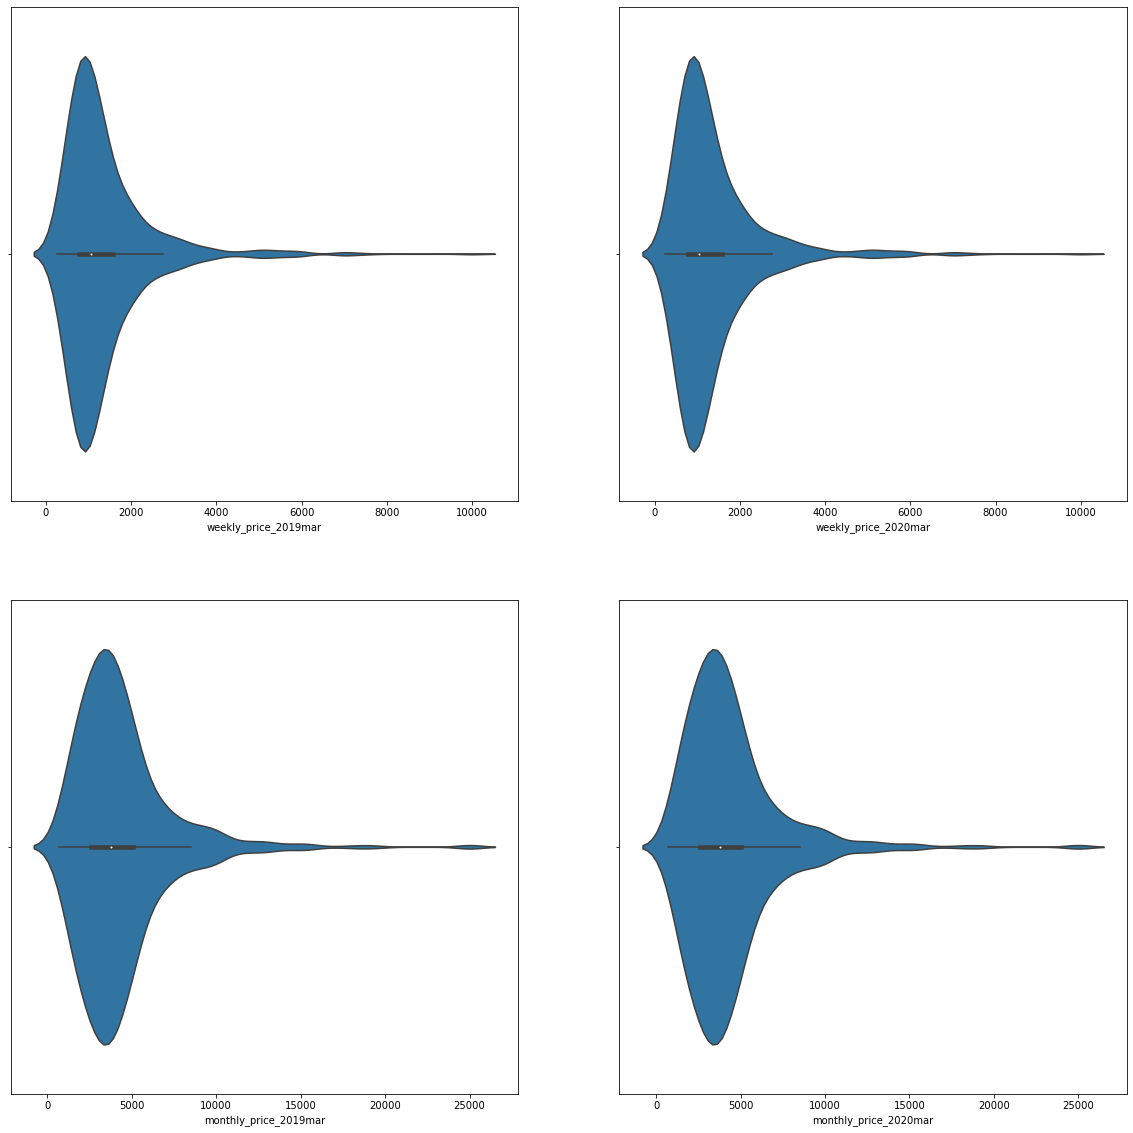

In [18]:
# 2019 March vs. 2020 March
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(20,20))
sns.violinplot(x=ab_march["weekly_price_2019mar"], ax=axs[0,0])
sns.violinplot(x=ab_march["weekly_price_2020mar"], ax=axs[0,1])
sns.violinplot(x=ab_march["monthly_price_2019mar"], ax=axs[1,0])
sns.violinplot(x=ab_march["monthly_price_2020mar"], ax=axs[1,1])
plt.show()

**No. We found that there almost no change in the price distribution for both monthly rent and weekly rent.**

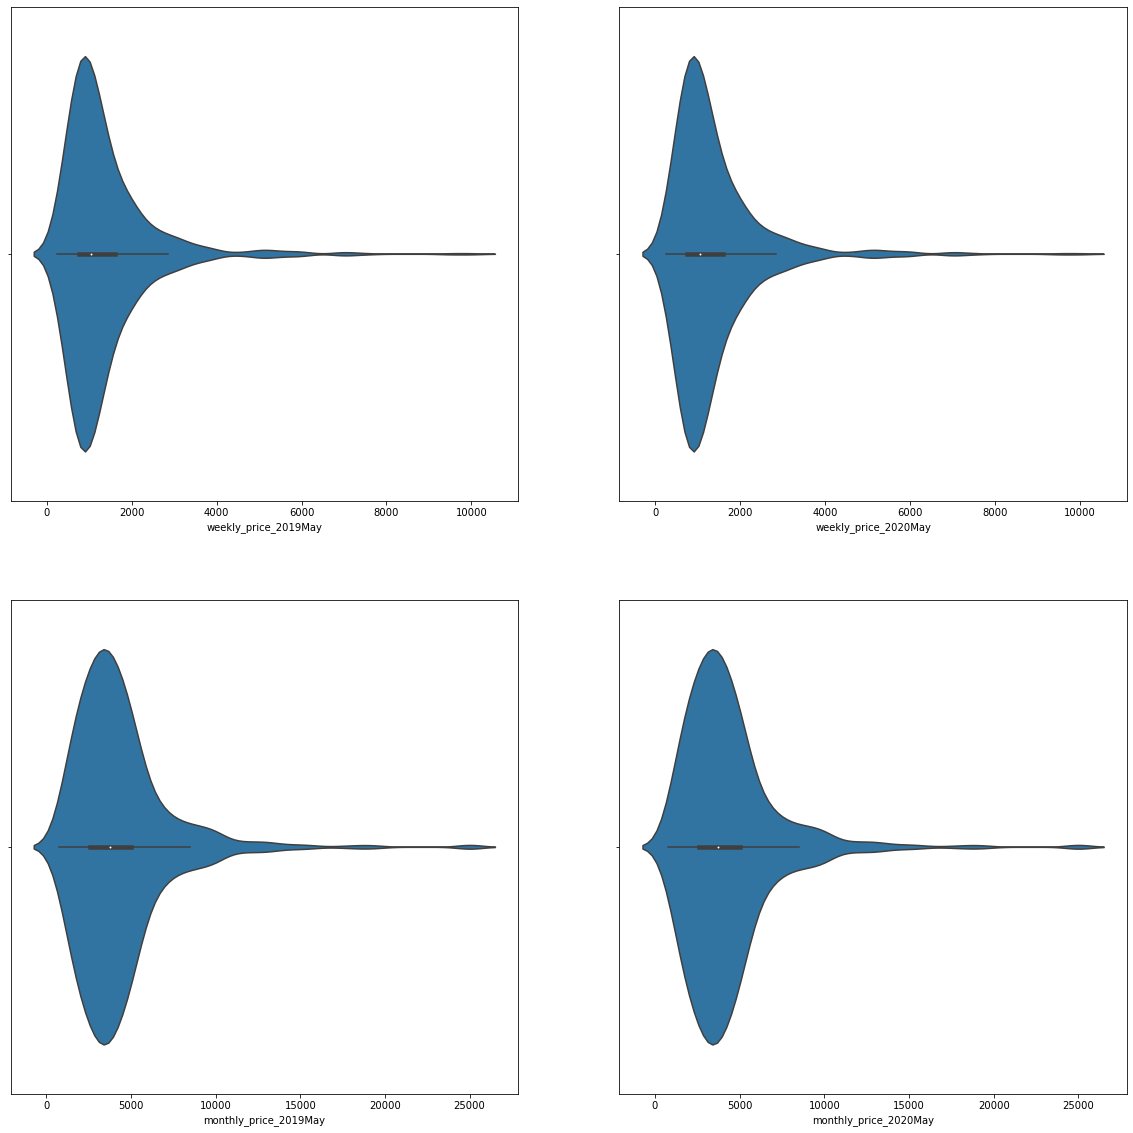

In [19]:
# 2019 may vs. 2020 may
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(20,20))
sns.violinplot(x=ab_may["weekly_price_2019May"], ax=axs[0,0])
sns.violinplot(x=ab_may["weekly_price_2020May"], ax=axs[0,1])
sns.violinplot(x=ab_may["monthly_price_2019May"], ax=axs[1,0])
sns.violinplot(x=ab_may["monthly_price_2020May"], ax=axs[1,1])
plt.show()

**Compare the distribution of personal hosts number and Agency Hosts number**  
Usually, personal hosts are real 'hosts' that are advocated by Airbnb. They hold small amount of listing, usually less than 3 listings per people. Let's see how does the COVID 19 impact the personal and agency hosts.

In [20]:
may2020_dist = ab_may.groupby("host_listings_count_2020May",as_index=False).count()
may2019_dist = ab_may.groupby("host_listings_count_2019May",as_index=False).count()

In [21]:
may2020_dist.head()

,host_listings_count_2020May,listing_url_2019May,scrape_id_2019May,last_scraped_2019May,name_2019May,summary_2019May,space_2019May,description_2019May,experiences_offered_2019May,neighborhood_overview_2019May,notes_2019May,transit_2019May,access_2019May,interaction_2019May,house_rules_2019May,thumbnail_url_2019May,medium_url_2019May,picture_url_2019May,xl_picture_url_2019May,host_id_2019May,host_url_2019May,host_name_2019May,host_since_2019May,host_location_2019May,host_about_2019May,host_response_time_2019May,host_response_rate_2019May,host_acceptance_rate_2019May,host_is_superhost_2019May,host_thumbnail_url_2019May,host_picture_url_2019May,host_neighbourhood_2019May,host_listings_count_2019May,host_total_listings_count_2019May,host_verifications_2019May,host_has_profile_pic_2019May,host_identity_verified_2019May,street_2019May,neighbourhood_2019May,neighbourhood_cleansed_2019May,neighbourhood_group_cleansed_2019May,city_2019May,state_2019May,zipcode_2019May,market_2019May,smart_location_2019May,country_code_2019May,country_2019May,latitude_2019May,longitude_2019May,is_location_exact_2019May,property_type_2019May,room_type_2019May,accommodates_2019May,bathrooms_2019May,bedrooms_2019May,beds_2019May,bed_type_2019May,amenities_2019May,square_feet_2019May,price_2019May,weekly_price_2019May,monthly_price_2019May,security_deposit_2019May,cleaning_fee_2019May,guests_included_2019May,extra_people_2019May,minimum_nights_2019May,maximum_nights_2019May,minimum_minimum_nights_2019May,maximum_minimum_nights_2019May,minimum_maximum_nights_2019May,maximum_maximum_nights_2019May,minimum_nights_avg_ntm_2019May,maximum_nights_avg_ntm_2019May,calendar_updated_2019May,has_availability_2019May,availability_30_2019May,availability_60_2019May,availability_90_2019May,availability_365_2019May,calendar_last_scraped_2019May,number_of_reviews_2019May,number_of_reviews_ltm_2019May,first_review_2019May,last_review_2019May,review_scores_rating_2019May,review_scores_accuracy_2019May,review_scores_cleanliness_2019May,review_scores_checkin_2019May,review_scores_communication_2019May,review_scores_location_2019May,review_scores_value_2019May,requires_license_2019May,license_2019May,jurisdiction_names_2019May,instant_bookable_2019May,is_business_travel_ready_2019May,cancellation_policy_2019May,require_guest_profile_picture_2019May,require_guest_phone_verification_2019May,calculated_host_listings_count_2019May,calculated_host_listings_count_entire_homes_2019May,calculated_host_listings_count_private_rooms_2019May,calculated_host_listings_count_shared_rooms_2019May,reviews_per_month_2019May,listing_url_2020May,scrape_id_2020May,last_scraped_2020May,name_2020May,summary_2020May,space_2020May,description_2020May,experiences_offered_2020May,neighborhood_overview_2020May,notes_2020May,transit_2020May,access_2020May,interaction_2020May,house_rules_2020May,thumbnail_url_2020May,medium_url_2020May,picture_url_2020May,xl_picture_url_2020May,host_id_2020May,host_url_2020May,host_name_2020May,host_since_2020May,host_location_2020May,host_about_2020May,host_response_time_2020May,host_response_rate_2020May,host_acceptance_rate_2020May,host_is_superhost_2020May,host_thumbnail_url_2020May,host_picture_url_2020May,host_neighbourhood_2020May,host_total_listings_count_2020May,host_verifications_2020May,host_has_profile_pic_2020May,host_identity_verified_2020May,street_2020May,neighbourhood_2020May,neighbourhood_cleansed_2020May,neighbourhood_group_cleansed_2020May,city_2020May,state_2020May,zipcode_2020May,market_2020May,smart_location_2020May,country_code_2020May,country_2020May,latitude_2020May,longitude_2020May,is_location_exact_2020May,property_type_2020May,room_type_2020May,accommodates_2020May,bathrooms_2020May,bedrooms_2020May,beds_2020May,bed_type_2020May,amenities_2020May,square_feet_2020May,price_2020May,weekly_price_2020May,monthly_price_2020May,security_deposit_2020May,cleaning_fee_2020May,guests_included_2020May,extra_people_2020May,minimum_nights_2020May,maximum_ni

*这里这个一开始图画的不对 需要重新画*

## Analyze the change before and after the Covid-19 - Beijing

In [23]:
download_blob("hackathon0711", "bj_2020_may.csv.gz", "bj_2020_may.csv.gz")
download_blob("hackathon0711", "bj_2019_may.csv.gz", "bj_2019_may.csv.gz")
download_blob("hackathon0711", "bj_2020_apr.csv.gz", "bj_2020_apr.csv.gz")
download_blob("hackathon0711", "bj_2019_apr.csv.gz", "bj_2019_apr.csv.gz")
download_blob("hackathon0711", "bj_2020_mar.csv.gz", "bj_2020_mar.csv.gz")
download_blob("hackathon0711", "bj_2019_mar.csv.gz", "bj_2019_mar.csv.gz")

Blob bj_2020_may.csv.gz downloaded to bj_2020_may.csv.gz.
Blob bj_2019_may.csv.gz downloaded to bj_2019_may.csv.gz.
Blob bj_2020_apr.csv.gz downloaded to bj_2020_apr.csv.gz.
Blob bj_2019_apr.csv.gz downloaded to bj_2019_apr.csv.gz.
Blob bj_2020_mar.csv.gz downloaded to bj_2020_mar.csv.gz.
Blob bj_2019_mar.csv.gz downloaded to bj_2019_mar.csv.gz.


In [47]:
df_bj_May_2020.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44054,https://www.airbnb.com/rooms/44054,20200527044855,2020-05-28,Modern and Comfortable Living in CBD,East Apartments offers comfortable living away...,East Apartments is a western managed serviced ...,East Apartments offers comfortable living away...,none,The neighborhood is a private compound. Just ...,"*For long term reservations (over 90 days), pl...",The easiest method to get around is by taxi or...,*Guests have access to the Fulicheng gardens,NaN,Registration All guests are required to have a...,NaN,NaN,https://a0.muscache.com/im/pictures/ccadd958-6...,NaN,192875,https://www.airbnb.com/users/show/192875,East Apartments,2010-08-06,"Beijing, Beijing, China",Hi everyone! My name is Sev. I'm the Owner/O...,within an hour,100%,96%,f,https://a0.muscache.com/im/pictures/user/9ea49...,https://a0.muscache.com/im/pictures/user/9ea49...,Shuangjing,5,5,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Beijing, Beijing, China",Chaoyang,朝阳区 / Chaoyang,NaN,Beijing,Beijing,100022,Beijing,"Beijing, China",CN,China,39.89425,116.45089,t,Serviced apartment,Entire home/apt,9,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1464.0,$845.00,"$8,471.00","$27,926.00",$716.00,$72.00,6,$72.00,2,365,2,2,365,365,2.0,365.0,4 months ago,t,0,26,56,331,2020-05-28,99,8,2010-08-25,2020-01-06,91.0,9.0,8.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,5,5,0,0,0.83
1,100213,https://www.airbnb.com/rooms/100213,20200527044855,2020-05-27,The Great Wall Box Deluxe Suite A团园长城小院东院套房,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,none,"5 mins walk to Panglongshan Great Wall, 25 min...","这里地处山区,森林覆盖率高,几乎没有PM2.5的影响｡但早晚温差大,尤其晚间气温较北京市区低...",We arrange taxi service at a very reasonable p...,NaN,NaN,"1, we have some kittens, thus it may not be su...",NaN,NaN,https://a0.muscache.com/im/pictures/85ad3843-0...,NaN,527062,https://www.airbnb.com/users/show/527062,Joe,2011-04-22,"Beijing, Beijing, China","我是老乔,喜欢长城,喜欢简单的生活｡\r\n2011年,我开始移居到北京东北部的古北口村,潮...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9699c...,https://a0.muscache.com/im/pictures/user/9699c...,NaN,4,4,"['phone', 'facebook', 'reviews']",t,f,"Be

In [24]:
df_bj_May_2020 = df_bj_May_2020.set_index(['id'])
df_bj_May_2019 = df_bj_May_2019.set_index(['id'])
df_bj_april_2020 = df_bj_april_2020.set_index(['id'])
df_bj_april_2019 = df_bj_april_2019.set_index(['id'])
df_bj_march_2020 = df_bj_march_2020.set_index(['id'])
df_bj_march_2019 = df_bj_march_2019.set_index(['id'])

df_bj_May_2020.columns = [str(col) + '_2020May' for col in df_bj_May_2020.columns]
df_bj_May_2019.columns = [str(col) + '_2019May' for col in df_bj_May_2019.columns]

df_bj_april_2020.columns = [str(col) + '_2020apr' for col in df_bj_april_2020.columns]
df_bj_april_2019.columns = [str(col) + '_2019apr' for col in df_bj_april_2019.columns]

df_bj_march_2020.columns = [str(col) + '_2020mar' for col in df_bj_march_2020.columns]
df_bj_march_2019.columns = [str(col) + '_2019mar' for col in df_bj_march_2019.columns]

In [25]:
ab_march_bj = df_bj_march_2019.merge(df_bj_march_2020,left_index=True, right_index=True)
ab_may_bj = df_bj_May_2019.merge(df_bj_May_2020,left_index=True, right_index=True)

In [26]:
# clean the price in airbnb
ab_march_bj['price_2019mar']= ab_march_bj['price_2019mar'].str.replace("$","")
ab_march_bj['price_2019mar'] = ab_march_bj['price_2019mar'].str.replace(".",".")
ab_march_bj['price_2019mar'] = ab_march_bj['price_2019mar'].str.replace(",","")
ab_march_bj['price_2019mar'] = pd.to_numeric(ab_march_bj['price_2019mar'])

ab_march_bj['weekly_price_2020mar']= ab_march_bj['weekly_price_2020mar'].str.replace("$","")
ab_march_bj['weekly_price_2020mar'] = ab_march_bj['weekly_price_2020mar'].str.replace(".",".")
ab_march_bj['weekly_price_2020mar'] = ab_march_bj['weekly_price_2020mar'].str.replace(",","")
ab_march_bj['weekly_price_2020mar'] = pd.to_numeric(ab_march_bj['weekly_price_2020mar'])

ab_march_bj['weekly_price_2019mar']= ab_march_bj['weekly_price_2019mar'].str.replace("$","")
ab_march_bj['weekly_price_2019mar'] = ab_march_bj['weekly_price_2019mar'].str.replace(".",".")
ab_march_bj['weekly_price_2019mar'] = ab_march_bj['weekly_price_2019mar'].str.replace(",","")
ab_march_bj['weekly_price_2019mar'] = pd.to_numeric(ab_march_bj['weekly_price_2019mar'])

ab_march_bj['monthly_price_2020mar']= ab_march_bj['monthly_price_2020mar'].str.replace("$","")
ab_march_bj['monthly_price_2020mar'] = ab_march_bj['monthly_price_2020mar'].str.replace(".",".")
ab_march_bj['monthly_price_2020mar'] = ab_march_bj['monthly_price_2020mar'].str.replace(",","")
ab_march_bj['monthly_price_2020mar'] = pd.to_numeric(ab_march_bj['monthly_price_2020mar'])

ab_march_bj['monthly_price_2019mar']= ab_march_bj['monthly_price_2019mar'].str.replace("$","")
ab_march_bj['monthly_price_2019mar'] = ab_march_bj['monthly_price_2019mar'].str.replace(".",".")
ab_march_bj['monthly_price_2019mar'] = ab_march_bj['monthly_price_2019mar'].str.replace(",","")
ab_march_bj['monthly_price_2019mar'] = pd.to_numeric(ab_march_bj['monthly_price_2019mar'])

### **Compare number of listings in the platform BEFORE and AFTER COVID19:**

In [27]:
## listing number in bj in 2020 vs.2019
print("Listing number in BJ in May,2020 is:{}".format(df_bj_May_2020.shape[0]))
print("Listing number in BJ in May,2019 is:{}".format(df_bj_May_2019.shape[0]))
print("Listing number in bBJ in April,2020 is:{}".format(df_bj_april_2020.shape[0]))
print("Listing number in BJ in April,2019 is:{}".format(df_bj_april_2019.shape[0]))
print("Listing number in BJ in March,2020 is:{}".format(df_bj_march_2020.shape[0]))
print("Listing number in BJ in March,2019 is:{}".format(df_bj_march_2019.shape[0]))

Listing number in BJ in May,2020 is:36864
Listing number in BJ in May,2019 is:31457
Listing number in bBJ in April,2020 is:37379
Listing number in BJ in April,2019 is:28452
Listing number in BJ in March,2020 is:37609
Listing number in BJ in March,2019 is:26402


In [38]:
## listing number in sf in 2020 vs.2019
no_listing_bj = [
df_bj_May_2020.shape[0],
df_bj_May_2019.shape[0],
df_bj_april_2020.shape[0],
df_bj_april_2019.shape[0],
df_bj_march_2020.shape[0],
df_bj_march_2019.shape[0], ]

year = [2020,2019,2020,2019,2020,2019]

month = ["May","May","April","April","March","March"]

n_listing_bj = pd.DataFrame(list(zip(year, month, no_listing_bj)), 
               columns =['Year', 'Month','Num_of_listing']) 
n_listing_bj

,Year,Month,Num_of_listing
0,2020,May,36864
1,2019,May,31457
2,2020,April,37379
3,2019,April,28452
4,2020,March,37609
5,2019,March,26402


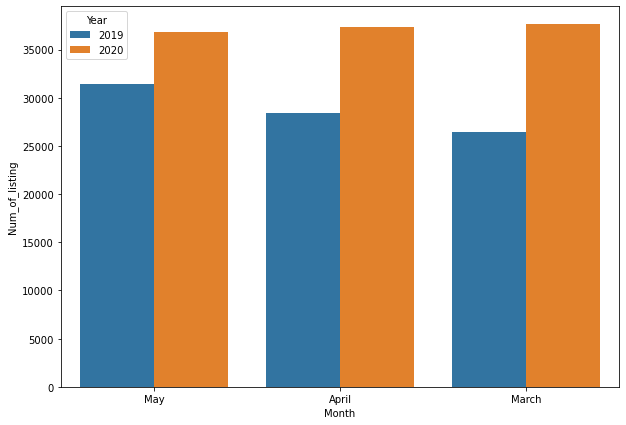

In [39]:
fig, axs = plt.subplots(figsize=(10,7))
sns.barplot(x="Month", y="Num_of_listing", hue="Year", data=n_listing_bj)

**Listing number in China has increased !**


In [28]:
## high availability among listing?
print("30-day availability:")
print(df_bj_May_2020[df_bj_May_2020['availability_30_2020May'] == 0].shape[0])
print(df_bj_May_2019[df_bj_May_2019['availability_30_2019May'] == 0].shape[0])
print(df_bj_april_2020[df_bj_april_2020['availability_30_2020apr'] == 0].shape[0])
print(df_bj_april_2019[df_bj_april_2019['availability_30_2019apr'] == 0].shape[0])
print(df_bj_march_2020[df_bj_march_2020['availability_30_2020mar'] == 0].shape[0])
print(df_bj_march_2019[df_bj_march_2019['availability_30_2019mar'] == 0].shape[0])

print("90-day availability:")
print(df_bj_May_2020[df_bj_May_2020['availability_90_2020May'] == 0].shape[0])
print(df_bj_May_2019[df_bj_May_2019['availability_90_2019May'] == 0].shape[0])
print(df_bj_april_2020[df_bj_april_2020['availability_90_2020apr'] == 0].shape[0])
print(df_bj_april_2019[df_bj_april_2019['availability_90_2019apr'] == 0].shape[0])
print(df_bj_march_2020[df_bj_march_2020['availability_90_2020mar'] == 0].shape[0])
print(df_bj_march_2019[df_bj_march_2019['availability_90_2019mar'] == 0].shape[0])

30-day availability:
26905
4427
36480
4200
16958
3701
90-day availability:
5667
3351
5869
3168
6815
2862


In [29]:
# display the availability_30 and availability_90 in table
total_listing = [df_bj_May_2020.shape[0],
df_bj_May_2019.shape[0],
df_bj_april_2020.shape[0],
df_bj_april_2019.shape[0],
df_bj_march_2020.shape[0],
df_bj_march_2019.shape[0]]

avai_30 = [df_bj_May_2020[df_bj_May_2020['availability_30_2020May'] == 0].shape[0],
          df_bj_May_2019[df_bj_May_2019['availability_30_2019May'] == 0].shape[0],
          df_bj_april_2020[df_bj_april_2020['availability_30_2020apr'] == 0].shape[0],
         df_bj_april_2019[df_bj_april_2019['availability_30_2019apr'] == 0].shape[0],
       df_bj_march_2020[df_bj_march_2020['availability_30_2020mar'] == 0].shape[0],
       df_bj_march_2019[df_bj_march_2019['availability_30_2019mar'] == 0].shape[0] ]

avai_90 = [
df_bj_May_2020[df_bj_May_2020['availability_90_2020May'] == 0].shape[0],
df_bj_May_2019[df_bj_May_2019['availability_90_2019May'] == 0].shape[0],
df_bj_april_2020[df_bj_april_2020['availability_90_2020apr'] == 0].shape[0],
df_bj_april_2019[df_bj_april_2019['availability_90_2019apr'] == 0].shape[0],
df_bj_march_2020[df_bj_march_2020['availability_90_2020mar'] == 0].shape[0],
df_bj_march_2019[df_bj_march_2019['availability_90_2019mar'] == 0].shape[0],
]

year = [2020,2019,2020,2019,2020,2019]

month = ["May","May","April","April","March","March"]

avail_bj = pd.DataFrame(list(zip(year, month, avai_30, avai_90, total_listing)), 
               columns =['Year', 'Month','N_Listing_without_availability_next_month',"N_Listing_without_availability_next_season",
                         "No_total_listing"]) 
avail_bj

,Year,Month,N_Listing_without_availability_next_month,N_Listing_without_availability_next_season,No_total_listing
0,2020,May,26905,5667,36864
1,2019,May,4427,3351,31457
2,2020,April,36480,5869,37379
3,2019,April,4200,3168,28452
4,2020,March,16958,6815,37609
5,2019,March,3701,2862,26402


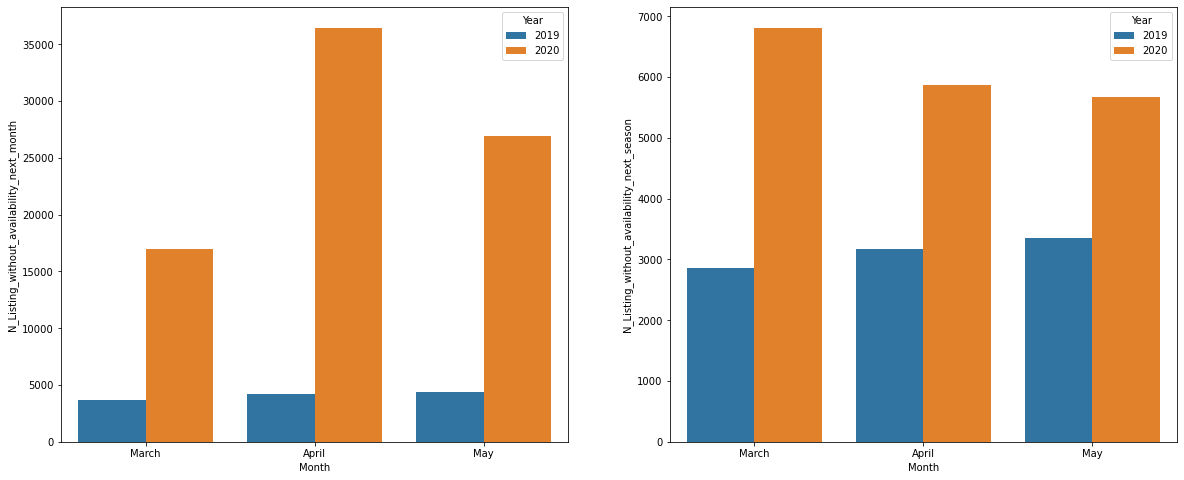

In [32]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(20,8))
sns.barplot(x="Month", y="N_Listing_without_availability_next_month", hue="Year", data=avail_bj,ax = axs[0],order=["March","April","May"] )
sns.barplot(x="Month", y="N_Listing_without_availability_next_season", hue="Year", data=avail_bj,ax = axs[1],order=["March","April","May"] )

### Let's further explore what people care about when looking for a place to stay. 

In [22]:
df_bj_May_2020["review_scores_rating"] = df_bj_May_2020.apply(lambda x: float(x["review_scores_rating"]),axis=1)

In [23]:
bj_review_score = df_bj_May_2020[["id","review_scores_cleanliness",
                            "review_scores_checkin","review_scores_communication",
                           "review_scores_location"]]
bj_review_score = bj_review_score.melt(id_vars=["id"], 
        var_name="review_type", 
        value_name="value")
bj_review_score.head(5)

,id,review_type,value
0,44054,review_scores_cleanliness,8.0
1,100213,review_scores_cleanliness,9.0
2,114384,review_scores_cleanliness,9.0
3,114465,review_scores_cleanliness,9.0
4,128496,review_scores_cleanliness,10.0


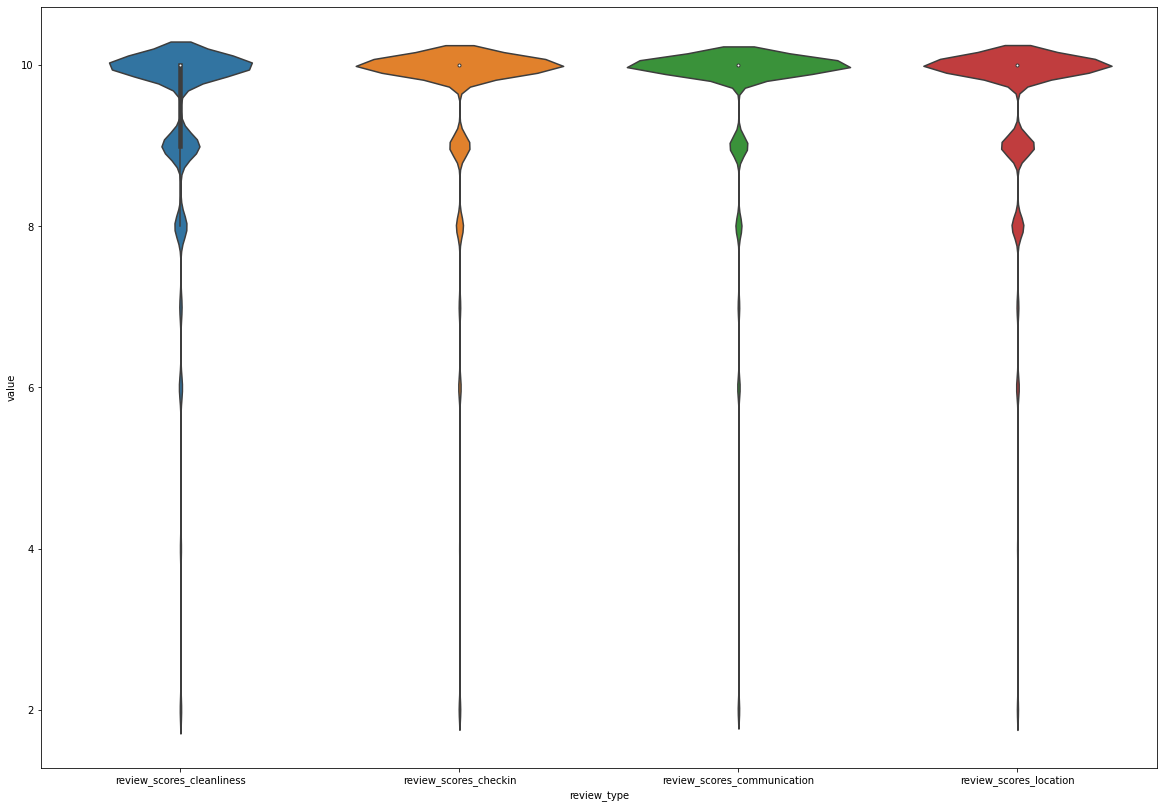

In [24]:
# visualization 
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=1,nrows=1,figsize=(20,14))
sns.violinplot(x=bj_review_score["review_type"],y=bj_review_score["value"])

**The scores for clenliness is worthy notice, it's lower than the scores in other dimension(communication, checkin, location). It indicates that the cleanliness service needs extra attention if Airbnb want to retain more customers.** 

# Topic modeling for SF

In [1]:
# Topic modeling for SF
import pandas as pd
import numpy as np
import datetime
from scipy import sparse
# word embedding 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import gensim 
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')

In [2]:
review_sf = pd.read_csv("reviews_sf_Jun08.csv.gz")
review_sf.shape  # There are 346k accumulatd reviews in Beijing market

(346037, 6)

### **Let's see whether the hosting experience and topic of the reviews will differ before and after COVID 19**

#### After COVID 19

In [3]:
review_sf_covid = review_sf[review_sf["date"]>"2020-02-01"]
review_sf_covid.shape

(11434, 6)

In [8]:
review = review_sf_covid["comments"].dropna()

# convert text to lower case 
review = review.str.lower()

# words Tokenization
review = review.apply(word_tokenize)

# remove punctuation
punctuations = list(string.punctuation)
punctuations.append('"')
punctuations.append('"')
punctuations.append('’',) 

review = review.apply(lambda x: 
           [i.strip("".join(punctuations)) for i in x if i not in punctuations])

# remove stop words 
stop_words=set(stopwords.words("english"))
newStopWords= ["san","francisco","sf"]
stop_words.update(newStopWords)
review = review.apply(lambda x: [item for item in x if item not in stop_words])
review

233       [prompt, response, check-in, process, smooth, ...
234       [lovely, apartment, amazing, location, stayed,...
235       [difficult, repeat, reviewers, said, holly, pl...
236       [beautiful, spot, convenient, downtown, quiet,...
237       [apartment, clean, charming, holly, quick, rep...
                                ...                        
346032                                                   []
346033    [one, best, stays, entire, place, extremely, s...
346034    [emphasize, beautiful, neat, airbnb, literally...
346035    [one, serviced, room, sure, coronavirus, overs...
346036    [great, space, really, enjoyed, adorable, flat...
Name: comments, Length: 11423, dtype: object

**Topic Modeling**

In [9]:
# Create Dictionary
rv_dictionary = gensim.corpora.Dictionary(review)

# Filter out tokens that appear in less than 1000 documents (absolute number) or more than 0.9 documents (percents of total corpus size).
#after the above two steps, keep only the first 20000 most frequent tokens.
rv_dictionary.filter_extremes(no_below=1000, no_above=0.9, keep_n=20000)

# Term Document Frequency
corpus = [rv_dictionary.doc2bow(text) for text in review]

In [14]:
review_sf_lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=rv_dictionary,
                                           num_topics=3, 
                                           random_state=0,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

for idx, topic in review_sf_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.133*"nice" + 0.131*"clean" + 0.114*"recommend" + 0.109*"everything" + 0.089*"amazing" + 0.085*"good" + 0.083*"really" + 0.075*"super" + 0.063*"close" + 0.061*"perfect"
Topic: 1 
Words: 0.555*"host" + 0.443*"space" + 0.000*"beautiful" + 0.000*"amazing" + 0.000*"everything" + 0.000*"home" + 0.000*"room" + 0.000*"recommend" + 0.000*"clean" + 0.000*"neighborhood"
Topic: 2 
Words: 0.170*"place" + 0.167*"great" + 0.130*"stay" + 0.082*"location" + 0.068*"room" + 0.050*"would" + 0.045*"home" + 0.042*"comfortable" + 0.041*"clean" + 0.041*"beautiful"


In [15]:
# Compute Perplexity: a measure of how good the model is, the lower the better
print('\nPerplexity: ', review_sf_lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model = CoherenceModel(model=review_sf_lda_model, texts=review, 
                                           dictionary=rv_dictionary, coherence='c_v')
coherence_ldamodel = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_ldamodel)


Perplexity:  -3.088407747446316

Coherence Score:  0.4450501834384384


#### After COVID 19

In [16]:
review_sf_normal = review_sf[(review_sf["date"]<="2020-02-01")& (review_sf["date"]>"2019-10-01")]
review_sf_normal

,listing_id,id,date,reviewer_id,reviewer_name,comments
219,958,541727046,2019-10-05,46437055,Tine,Comfortable and nice apartment with all the eq...
220,958,545178173,2019-10-11,162073666,Marco,Holly's place is a perfect place to stay in SF...
221,958,545670168,2019-10-12,12606101,B. Bea,Holly's place is right next to the park on an ...
222,958,554590898,2019-10-26,10324626,Susanne,"Holly‘s place is just great: much space, well ..."
223,958,556177188,2019-10-28,16234299,Jake,Great location. Very nice space.
...,...,...,...,...,...,...
345748,41461776,593388768,2020-01-15,338459,Schuyler,"Wonderful stay, highly recommend. Great neighb..."
345756,41502513,594519833,2020-01-18,38621391,Siena,"샌프란 다운타운은 많이 지저분한데, 주거지역이라 주변도 정말 깨끗하고 호스트도 친절..."
345757,41502513,598210034,2020-01-26,157582491,Patrick,A gorgeous house and the room and bathroom cou...
345765,41507976,595299971,2020-01-19,173207075,Jawaun,Good place to stay!


In [17]:
review_nm = review_sf_normal["comments"].dropna()

# convert text to lower case 
review_nm = review_nm.str.lower()

# words Tokenization
review_nm = review_nm.apply(word_tokenize)

# remove punctuation
punctuations = list(string.punctuation)
punctuations.append('"')
punctuations.append('"')
punctuations.append('‘')
punctuations.append('‘')
punctuations.append('’')
review_nm = review_nm.apply(lambda x: 
           [i.strip("".join(punctuations)) for i in x if i not in punctuations])

# remove stop words 
stop_words=set(stopwords.words("english"))

newStopWords= ["san","francisco","sf"]
stop_words.update(newStopWords)
review_nm = review_nm.apply(lambda x: [item for item in x if item not in stop_words])

In [18]:
# Create Dictionary
nm_dictionary = gensim.corpora.Dictionary(review_nm)

# Filter out tokens that appear in less than 1000 documents (absolute number) or more than 0.9 documents (percents of total corpus size).
#after the above two steps, keep only the first 20000 most frequent tokens.
nm_dictionary.filter_extremes(no_below=1000, no_above=0.9, keep_n=20000)

# Term Document Frequency
corpus_nm = [nm_dictionary.doc2bow(text) for text in review_nm]

In [19]:
review_sf_lda_model_nm = gensim.models.ldamodel.LdaModel(corpus=corpus_nm,
                                           id2word=nm_dictionary,
                                           num_topics=5, 
                                           random_state=0,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True,)

for idx, topic in review_sf_lda_model_nm.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.584*"really" + 0.256*"enjoyed" + 0.157*"fantastic" + 0.000*"spot" + 0.000*"public" + 0.000*"kitchen" + 0.000*"spacious" + 0.000*"access" + 0.000*"little" + 0.000*"amazing"
Topic: 1 
Words: 0.113*"great" + 0.112*"place" + 0.087*"stay" + 0.078*"clean" + 0.043*"nice" + 0.043*"would" + 0.041*"host" + 0.035*"comfortable" + 0.033*"recommend" + 0.031*"space"
Topic: 2 
Words: 0.498*"room" + 0.163*"bathroom" + 0.144*"check" + 0.109*"excellent" + 0.084*"private" + 0.000*"kitchen" + 0.000*"night" + 0.000*"bed" + 0.000*"many" + 0.000*"even"
Topic: 3 
Words: 0.444*"location" + 0.200*"good" + 0.103*"restaurants" + 0.075*"convenient" + 0.070*"walking" + 0.060*"distance" + 0.048*"lots" + 0.000*"many" + 0.000*"communication" + 0.000*"public"
Topic: 4 
Words: 0.045*"easy" + 0.039*"everything" + 0.038*"home" + 0.035*"perfect" + 0.034*"close" + 0.032*"house" + 0.032*"apartment" + 0.031*"quiet" + 0.031*"city" + 0.030*"also"


In [20]:
# Compute Perplexity: a measure of how good the model is, the lower the better
print('\nPerplexity: ', review_sf_lda_model_nm.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_nm = CoherenceModel(model=review_sf_lda_model_nm, texts=review_nm, 
                                           dictionary=nm_dictionary, coherence='c_v')
coherence_ldamodel = coherence_model_nm.get_coherence()
print('\nCoherence Score: ', coherence_ldamodel)


Perplexity:  -4.496968682093524

Coherence Score:  0.5285770044011301
